<a href="https://colab.research.google.com/github/JamesChenPoChih/Google_Review_Crawling_Dwave/blob/main/2024_0402_Crawl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Noise Eraser Google Review 文字探勘分析

## i. 安裝套件 & 爬蟲資料

In [ ]:
!pip install -q google_play

In [ ]:
!pip install -q transformers # Sentiment

In [ ]:
!pip install -q plotly-express # Data Visuallization

In [ ]:
!pip install pyyaml==5.4.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
!pip install google-play-scraper


In [ ]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [ ]:
my_project = reviews_all( 'com.dwave.noiseraser', sleep_milliseconds = 0, lang='en', country ='US', sort = Sort.NEWEST)

In [ ]:
my_project

[{'reviewId': '7aaebcd3-680f-4ef2-be8d-df4321c1c343',
  'userName': 'Thinkingvideos',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocItX1FKRiySGV4y6tvLBjZxbILu1yICPa7b0RvOIUYn=mo',
  'content': 'lovely',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': None,
  'at': datetime.datetime(2024, 3, 31, 23, 4, 9),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': None},
 {'reviewId': 'db98ae70-57b0-4dcf-a33b-300b8319a760',
  'userName': 'Norealle Ehab',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjVxyBE02i_PHwJAtrvHqaZVuObwLPSd5Md4ctE9nMXcBZk',
  'content': 'love it',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '2.0.8',
  'at': datetime.datetime(2024, 3, 31, 20, 48, 15),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '2.0.8'},
 {'reviewId': 'c0fda81f-912e-4e67-89e9-6a289e51ff02',
  'userName': 'Aminur Rahman',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocKGW1JZe_Vmp4ultPZnqIvZhHnPCI9zFXex

In [ ]:
from pandas import json_normalize

# Assuming 'my_project' is your JSON object
df = json_normalize(my_project)


In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,7aaebcd3-680f-4ef2-be8d-df4321c1c343,Thinkingvideos,https://play-lh.googleusercontent.com/a/ACg8oc...,lovely,5,0,None,2024-03-31 23:04:09,None,NaT,None
1,db98ae70-57b0-4dcf-a33b-300b8319a760,Norealle Ehab,https://play-lh.googleusercontent.com/a-/ALV-U...,love it,5,0,2.0.8,2024-03-31 20:48:15,None,NaT,2.0.8
2,c0fda81f-912e-4e67-89e9-6a289e51ff02,Aminur Rahman,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,2.0.8,2024-03-31 10:14:57,None,NaT,2.0.8
3,91b21f9c-0c7f-4c51-bce2-f453359264fb,Noriel Drae,https://play-lh.googleusercontent.com/a-/ALV-U...,super useful,5,0,2.0.8,2024-03-30 17:03:17,None,NaT,2.0.8
4,5f16e632-0fb5-4ccf-a882-9955d90e6c0b,Hannah Jane Laza,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,2.0.8,2024-03-30 13:49:13,None,NaT,2.0.8


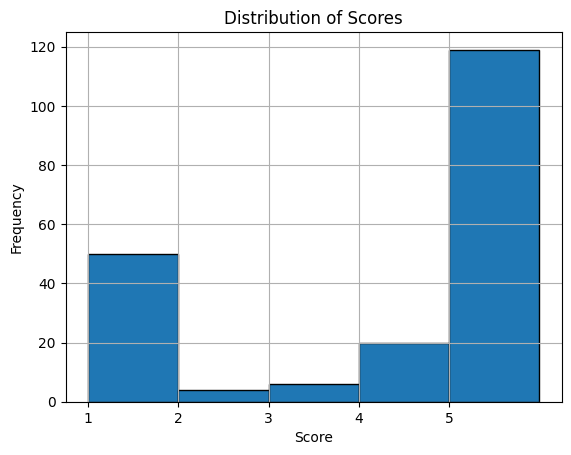

In [ ]:
import matplotlib.pyplot as plt

scores = df['score']

# 繪製直方圖
plt.hist(scores, bins=range(1, 7), edgecolor='black') # 將分數分佈在1到6之間的柱狀圖中
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.xticks(range(1, 6))  # x軸標籤設置為1到5的分數
plt.grid(True)
plt.show()


In [ ]:
df['score'].mean()

3.7738693467336684

In [ ]:
df['reviewCreatedVersion'].value_counts()

2.0.7    62
2.0.2    55
2.0.8    40
2.0.3     5
2.0.5     4
2.0.6     2
1.2.6     1
1.2.2     1
Name: reviewCreatedVersion, dtype: int64

In [ ]:
from transformers import pipeline


In [ ]:
sentiment_analysis = pipeline("sentiment-analysis", model = 'siebert/sentiment-roberta-large-english')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
print(sentiment_analysis("I love this!"))

[{'label': 'POSITIVE', 'score': 0.9988656044006348}]


### i.情感分析

In [ ]:
df.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt               datetime64[ns]
appVersion                      object
dtype: object

In [ ]:
df['content'] = df['content'].astype('str')

In [ ]:
df['result'] = df['content'].apply(lambda x: sentiment_analysis(x))

In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,result
0,7aaebcd3-680f-4ef2-be8d-df4321c1c343,Thinkingvideos,https://play-lh.googleusercontent.com/a/ACg8oc...,lovely,5,0,None,2024-03-31 23:04:09,None,NaT,None,"[{'label': 'POSITIVE', 'score': 0.998652577400..."
1,db98ae70-57b0-4dcf-a33b-300b8319a760,Norealle Ehab,https://play-lh.googleusercontent.com/a-/ALV-U...,love it,5,0,2.0.8,2024-03-31 20:48:15,None,NaT,2.0.8,"[{'label': 'POSITIVE', 'score': 0.998789489269..."
2,c0fda81f-912e-4e67-89e9-6a289e51ff02,Aminur Rahman,https://play-lh.googleusercontent.com/a/ACg8oc...,good,5,0,2.0.8,2024-03-31 10:14:57,None,NaT,2.0.8,"[{'label': 'POSITIVE', 'score': 0.998530626296..."
3,91b21f9c-0c7f-4c51-bce2-f453359264fb,Noriel Drae,https://play-lh.googleusercontent.com/a-/ALV-U...,super useful,5,0,2.0.8,2024-03-30 17:03:17,None,NaT,2.0.8,"[{'label': 'POSITIVE', 'score': 0.998490214347..."
4,5f16e632-0fb5-4ccf-a882-9955d90e6c0b,Hannah Jane Laza,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,2.0.8,2024-03-30 13:49:13,None,NaT,2.0.8,"[{'label': 'POSITIVE', 'score': 0.998530626296..."


In [ ]:
df.shape

(199, 12)

In [ ]:
y = sentiment_analysis("I love this!")

In [ ]:
y[0]['label']

'POSITIVE'

In [ ]:
y[0]['score']

0.9988656044006348

In [ ]:
df['sentiment'] = df['result'].apply(lambda x: (x[0]['label']))
df['score'] = df['result'].apply(lambda x: (x[0]['score']))

In [ ]:
df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,result,sentiment
0,7aaebcd3-680f-4ef2-be8d-df4321c1c343,Thinkingvideos,https://play-lh.googleusercontent.com/a/ACg8oc...,lovely,0.998653,0,None,2024-03-31 23:04:09,None,NaT,None,"[{'label': 'POSITIVE', 'score': 0.998652577400...",POSITIVE
1,db98ae70-57b0-4dcf-a33b-300b8319a760,Norealle Ehab,https://play-lh.googleusercontent.com/a-/ALV-U...,love it,0.998789,0,2.0.8,2024-03-31 20:48:15,None,NaT,2.0.8,"[{'label': 'POSITIVE', 'score': 0.998789489269...",POSITIVE
2,c0fda81f-912e-4e67-89e9-6a289e51ff02,Aminur Rahman,https://play-lh.googleusercontent.com/a/ACg8oc...,good,0.998531,0,2.0.8,2024-03-31 10:14:57,None,NaT,2.0.8,"[{'label': 'POSITIVE', 'score': 0.998530626296...",POSITIVE
3,91b21f9c-0c7f-4c51-bce2-f453359264fb,Noriel Drae,https://play-lh.googleusercontent.com/a-/ALV-U...,super useful,0.998490,0,2.0.8,2024-03-30 17:03:17,None,NaT,2.0.8,"[{'label': 'POSITIVE', 'score': 0.998490214347...",POSITIVE
4,5f16e632-0fb5-4ccf-a882-9955d90e6c0b,Hannah Jane Laza,https://play-lh.googleusercontent.com/a-/ALV-U...,good,0.998531,0,2.0.8,2024-03-30 13:49:13,None,NaT,2.0.8,"[{'label': 'POSITIVE', 'score': 0.998530626296...",POSITIVE


### ii.繪製直方圖

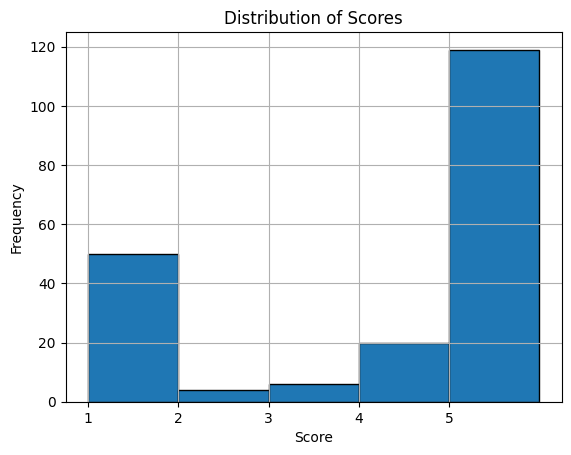

In [ ]:
import matplotlib.pyplot as plt



# 繪製直方圖
plt.hist(scores, bins=range(1, 7), edgecolor='black') # 將分數分佈在1到6之間的柱狀圖中
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.xticks(range(1, 6))  # x軸標籤設置為1到5的分數
plt.grid(True)
plt.show()


In [ ]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'result', 'sentiment'],
      dtype='object')

### iii.score的平均分數

In [1]:
df['score'].mean()

NameError: name 'df' is not defined

In [2]:
df['sentiment'].value_counts(normalize = True)

NameError: name 'df' is not defined

In [ ]:
flg = px.histogram(df, x='sentiment', color='sentiment', text_auto = True)

flg.show()

## ii. 文本分析

In [ ]:
from google.colab import drive

您可以使用NLP模型來進行以下任務：

情感分析：評估Google評論的情感，判斷評論是正面的、負面的還是中立的。

主題建模：識別評論中討論的主題或話題，這有助於了解人們對您業務的主要關注點。

文本分類：將評論分類為不同的類別，例如服務質量、產品品質、價格等，以便更好地理解客戶的反饋。

關鍵詞提取：識別評論中的關鍵詞或短語，這有助於您了解客戶最關心的問題。

用戶意圖分析：分析評論中的用戶意圖，以便更好地回應客戶的需求或解決問題。

文本生成：基於評論數據生成新的文本，例如回覆客戶評論或提供更多信息。

名詞實體識別（NER）：識別評論中提到的特定實體，例如地點、人名、產品名稱等。

建立主題建模通常需要使用機器學習或深度學習模型，其中一個常見的技術是Latent Dirichlet Allocation（LDA）。LDA 是一種用於發現文檔集合中隱含的主題結構的概率生成模型。以下是使用 Python 中的 Gensim 库来實現 LDA 主題建模的基本步驟：

1.文本預處理：將文本轉換為可用於建模的格式，包括標記化、停用詞移除、詞幹提取或詞形還原等步驟。


2.建立字典和語料庫：將文本轉換為 Gensim 可以處理的格式，並建立詞彙字典和語料庫。

3.訓練 LDA 模型：使用訓練集訓練 LDA 模型，指定主題數量等超參數。

4.評估模型：檢查模型的性能，例如主題的合理性和一致性。

5.解釋主題：檢查每個主題的詞彙分佈，以了解每個主題代表的含義。

1.文本預處理

根據提供的文件，進行預處理的步驟可以包括以下操作：

文本清理：去除不需要的字符，如標點符號、特殊符號等。

標記化：將每個評論文本拆分成單詞或詞幹。

停用詞移除：去除常見的停用詞，例如 "the", "is", "and" 等，這些詞對於主題建模沒有實際意義。

詞性標註（選擇性）：將單詞標註為名詞、動詞、形容詞等，以便更好地理解文本的結構。

詞幹提取或詞形還原：將單詞轉換為它們的基本形式，以減少詞彙的變化形式。

下面是一個Python示例，演示如何使用NLTK庫進行基本的文本預處理：

In [ ]:
pip install pandas nltk


### i.高頻的 top 20 字彙

In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')


# 將所有評論內容串接成一個字串
all_reviews = ' '.join(df['content'])

# 將字串拆分成單字
tokens = word_tokenize(all_reviews)

# 計算單字出現次數
word_freq = Counter(tokens)

# 取出前20高頻出現的單字
top_20_words = word_freq.most_common(20)

# 輸出結果
print("Top 20 frequent words:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Top 20 frequent words:
.: 68
app: 67
it: 54
I: 46
the: 44
to: 42
and: 35
n't: 27
good: 26
this: 26
!: 25
is: 25
very: 22
a: 21
,: 20
my: 20
for: 19
use: 15
nice: 15
noise: 14


### ii.高頻的top 20 詞彙 (修改)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

# 下載停用詞和詞形還原器所需的資源
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# 定義停用詞列表
stop_words = set(stopwords.words('english'))

# 初始化詞幹提取器和詞形還原器
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 去除非字母字符
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # 小寫轉換
    text = text.lower()
    # 分詞
    word_tokens = word_tokenize(text)
    # 去除停用詞
    filtered_sentence = [word for word in word_tokens if word not in stop_words]
    # 詞形還原
    lemmatized_sentence = [lemmatizer.lemmatize(word) for word in filtered_sentence]
    # 返回預處理後的文本
    return ' '.join(lemmatized_sentence)

# 對每條評論進行預處理
preprocessed_texts = []
for text in df['content']:
    preprocessed_texts.append(preprocess_text(text))

# 打印預處理後的文本
for text in preprocessed_texts:
    print(text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


lovely
love
good
super useful
good
amazing remove noise thank noise eraser
awesome app
first let edit video upto hour said hour premium user let edit mint video duration
awesome
worst app ever always stock start processing export video
recommend app easy use useful creating video
awesome
watermark pff
best app
recommend app
worthless waste time
nice
wow
good
creating account using email log app website pricing twd month around usd lz really expensive
filter anything player better app heck use
work
useful app
great app work perfectly

holyholy hy ol l yhwhholy
let login
actually loved app like say remove background noise anything
nice
app perfect
good
app amazing really helped lot
excellent work
work great
amazing app
wow app really made trouble easy
good
app amazing able remove background noise video using app highly recommended
bad app install app tried edit video work disappointing
effective
actually working keep good work guy
effective app
work wonder video vocal noise background co

In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# 下載NLTK的停用詞列表
nltk.download('stopwords')


# 將所有評論內容串接成一個字串
all_reviews = ' '.join(df['content'])

# 將字串拆分成單字
tokens = word_tokenize(all_reviews)

# 取得停用詞列表
stop_words = set(stopwords.words('english'))

# 移除停用詞和單字長度小於等於1的單字
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 1]

# 計算單字出現次數
word_freq = Counter(filtered_tokens)

# 取出前20高頻出現的單字
top_20_words = word_freq.most_common(20)

# 輸出結果
print("Top 20 frequent words:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")


Top 20 frequent words:
app: 67
n't: 27
good: 26
use: 15
nice: 15
noise: 14
video: 13
audio: 13
really: 12
's: 12
..: 12
work: 10
amazing: 8
Good: 7
works: 7
remove: 6
edit: 6
easy: 6
best: 6
love: 5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# 下載NLTK的停用詞列表和標點符號列表
nltk.download('stopwords')
nltk.download('punkt')


# 將所有評論內容串接成一個字串
all_reviews = ' '.join(df['content'])

# 將字串拆分成單字
tokens = word_tokenize(all_reviews)

# 取得停用詞列表
stop_words = set(stopwords.words('english'))

# 添加更多的無用詞到停用詞列表
additional_stop_words = ["n't", "'s", "!", "....", "..", "..."]
stop_words.update(additional_stop_words)

# 移除停用詞和單字長度小於等於1的單字
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 1]

# 計算單字出現次數
word_freq = Counter(filtered_tokens)

# 取出前20高頻出現的單字
top_20_words = word_freq.most_common(20)

# 輸出結果
print("Top 20 frequent words:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")



Top 20 frequent words:
app: 67
good: 26
use: 15
nice: 15
noise: 14
video: 13
audio: 13
really: 12
work: 10
amazing: 8
Good: 7
works: 7
remove: 6
edit: 6
easy: 6
best: 6
love: 5
super: 5
awesome: 5
let: 5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


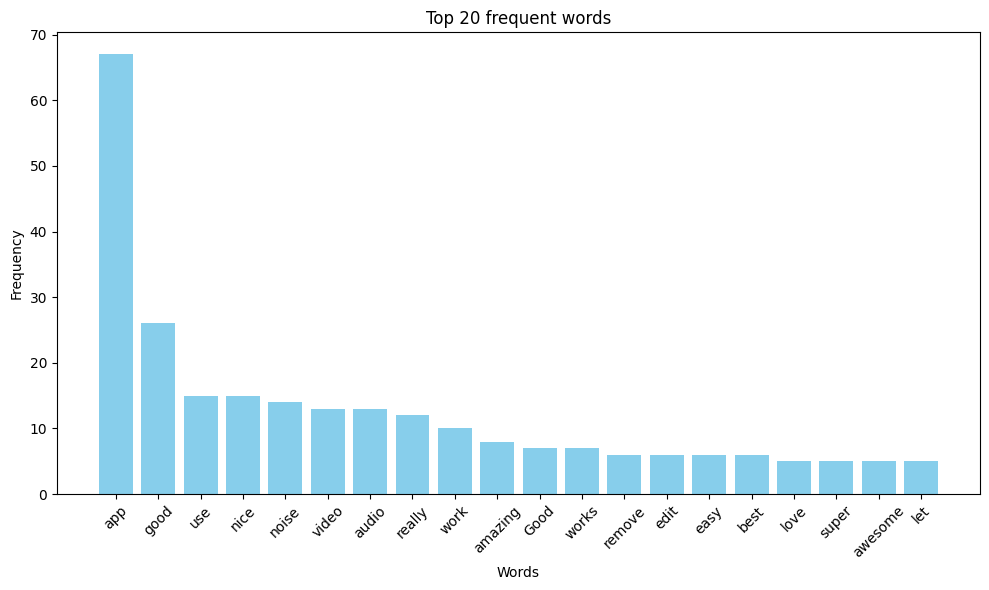

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# 下載NLTK的停用詞列表和標點符號列表
nltk.download('stopwords')
nltk.download('punkt')

# 將所有評論內容串接成一個字串
all_reviews = ' '.join(df['content'])

# 將字串拆分成單字
tokens = word_tokenize(all_reviews)

# 取得停用詞列表
stop_words = set(stopwords.words('english'))

# 添加更多的無用詞到停用詞列表
additional_stop_words = ["n't", "'s", "!", "....", "..", "..."]
stop_words.update(additional_stop_words)

# 移除停用詞和單字長度小於等於1的單字
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 1]

# 計算單字出現次數
word_freq = Counter(filtered_tokens)

# 取出前20高頻出現的單字
top_20_words = word_freq.most_common(20)

# 提取單字和出現次數
words = [pair[0] for pair in top_20_words]
freqs = [pair[1] for pair in top_20_words]

# 繪製直條圖
plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 frequent words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


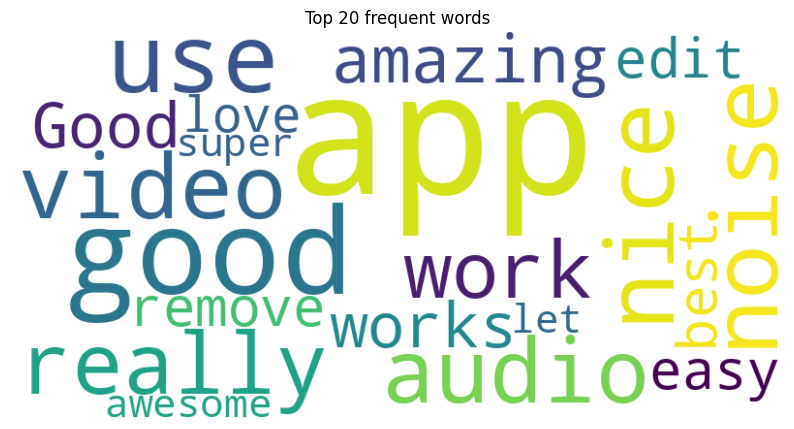

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# 下載NLTK的停用詞列表和標點符號列表
nltk.download('stopwords')
nltk.download('punkt')


# 將所有評論內容串接成一個字串
all_reviews = ' '.join(df['content'])

# 將字串拆分成單字
tokens = word_tokenize(all_reviews)

# 取得停用詞列表
stop_words = set(stopwords.words('english'))

# 添加更多的無用詞到停用詞列表
additional_stop_words = ["n't", "'s", "!", "....", "..", "..."]
stop_words.update(additional_stop_words)

# 移除停用詞和單字長度小於等於1的單字
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 1]

# 計算單字出現次數
word_freq = Counter(filtered_tokens)

# 取出前20高頻出現的單字
top_20_words = dict(word_freq.most_common(20))

# 生成文字雲
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_20_words)

# 繪製文字雲
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 frequent words')
plt.show()


iii. 高頻的 negative 字彙

In [ ]:
import pandas as pd



# 選擇負面評論
negative_reviews = df[df['sentiment'] == 'NEGATIVE']

# 顯示負面評論的內容
for index, row in negative_reviews.iterrows():
    print(row['content'])


At first they let me edit videos upto 1.30+hours & said 2 hours for premium user. Now they Won't let me edit more than 5 mints of video duration.
The worst app I ever had, its always stock in start processing. I can't export my video
Has watermark. Pff!
Worthless, waste of time
after creating an account using email I can't log in to this app and and on their website pricing is TWD 140 / month around 43 USD lz really expensive
It doesn't filter anything my player do it better than the app I don't what the heck is it's use
HOLYHOLY HY OL L.O YHWHHOLY
Wouldn't let me login.
Very bad app.. install this app and tried to edit a video but it doesn't work at all😑very disappointing👎🏻😡
Useless
I just wanted to try it, why do I need to sign in+ the reply from the devs is f rtarded, f your analysis
20 min free pay up to use don't pay not worth it
Background noise not erase by this app
sh🙅t app ,doest work, it does not let you edit 🙃
Very bad
It's too long to download
You have to sign up with an em

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# 下載NLTK的停用詞列表和標點符號列表
nltk.download('stopwords')
nltk.download('punkt')

# 選擇負面評論
negative_reviews = df[df['sentiment'] == 'NEGATIVE']

# 將所有負面評論內容串接成一個字串
all_negative_reviews = ' '.join(negative_reviews['content'])

# 將字串拆分成單字
tokens = word_tokenize(all_negative_reviews)

# 取得停用詞列表
stop_words = set(stopwords.words('english'))

# 添加更多的無用詞到停用詞列表
additional_stop_words = ["n't", "'s", "!", "....", "..", "..."]
stop_words.update(additional_stop_words)

# 將"Ca"和"ca"排除在外
stop_words.discard("Ca")
stop_words.discard("ca")

# 移除停用詞和單字長度小於等於1的單字
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 1]

# 計算單字出現次數
word_freq = Counter(filtered_tokens)

# 取出前10高頻出現的單字
top_20_words = word_freq.most_common(20)

# 輸出結果
print("Top 10 frequent words in negative reviews:")
for word, freq in top_20_words:
    print(f"{word}: {freq}")


Top 10 frequent words in negative reviews:
app: 20
video: 9
use: 9
audio: 7
edit: 6
work: 5
let: 4
start: 4
bad: 4
error: 4
file: 4
want: 4
ca: 3
tried: 3
try: 3
need: 3
sign: 3
get: 3
fix: 3
Ca: 3


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


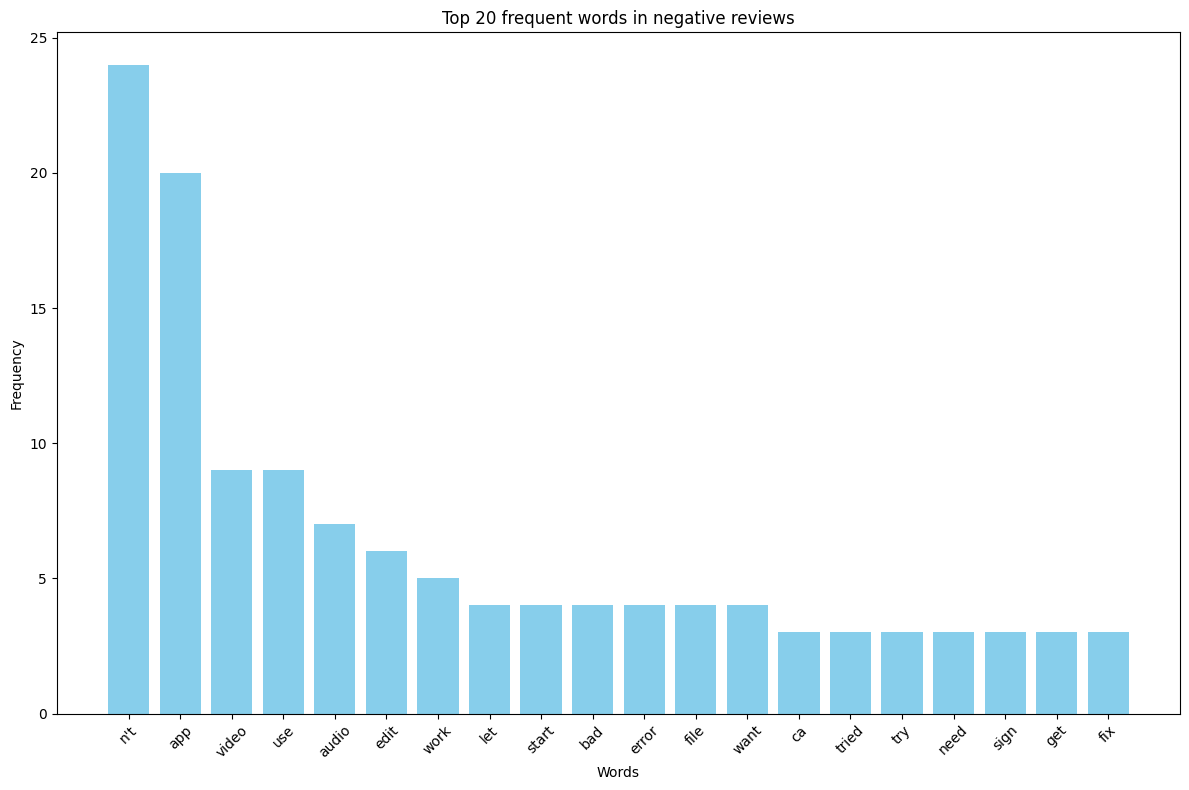

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# 下載NLTK的停用詞列表和標點符號列表
nltk.download('stopwords')
nltk.download('punkt')

# 選擇負面評論
negative_reviews = df[df['sentiment'] == 'NEGATIVE']

# 將所有負面評論內容串接成一個字串
all_negative_reviews = ' '.join(negative_reviews['content'])

# 將字串拆分成單字
tokens = word_tokenize(all_negative_reviews)

# 取得停用詞列表
stop_words = set(stopwords.words('english'))

# 添加更多的無用詞到停用詞列表
additional_stop_words = ["'s", "!", "....", "..", "..."]
stop_words.update(additional_stop_words)


# 將"Can't"視為一個單字處理
filtered_tokens = ['Can\'t' if word == "Can" and tokens[i+1] == "n't" else word for i, word in enumerate(filtered_tokens)]

# # 將"Ca"和"ca"排除在外
stop_words.discard("Ca")
stop_words.discard("ca")

# 移除停用詞和單字長度小於等於1的單字
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and len(word) > 1]

# 將"Can't"視為一個單字處理
filtered_tokens = ['Can\'t' if word == "Can" and tokens[i+1] == "n't" else word for i, word in enumerate(filtered_tokens)]

# 計算單字出現次數
word_freq = Counter(filtered_tokens)

# 取得負面評論中前20高頻出現的單字及其出現次數
top_20_words = dict(word_freq.most_common(20))

# 繪製直條圖
plt.figure(figsize=(12, 8))
plt.bar(top_20_words.keys(), top_20_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 frequent words in negative reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
